<center>
  <div style="font-family: Arial, sans-serif; background-color: #72a0e5; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Churn Prediction Project
  </div>
</center>

# Summary

### Chapter 1: Exploratory Data Analysis
- 1.1: Import Data and Initial Analysis
- 1.2: Check for Missing Values
- 1.3: Check for Unique Values
- 1.4: Graphical Analysis

### Chapter 2: Data Processing
- 2.1: Map Columns
- 2.2: One Hot Encoding
- 2.3: Data Splitting
- 2.4: Handle Missing Values
- 2.5: Standard Scaler
- 2.6: Undersampling
- 2.7: Oversampling

### Chapter 3: Machine Learning Model Building
- 3.1: Logistic Regression
- 3.2: Logistic Regression 2
- 3.3: Random Forest
- 3.4: Gradient Boosting Classifier
- 3.5: Linear SVC
- 3.6: Sequential Neural Network
- 3.7: Analyzing Best Results

### Chapter 4: Model Testing and Conclusion

<center>
  <div style="font-family: Arial, sans-serif; background-color: #72a0e5; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 1: Exploratory Data Analysis
  </div>
</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Import Data and Initial Analysis

In [2]:
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=(' '))
churn_df = churn_df.drop(columns=['customerID'])


churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### 1.2: Check for Missing Values

In [5]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 1.3: Check for Unique Values

In [6]:
columns_to_check = ['gender', 'SeniorCitizen']

for column in columns_to_check:
    unique_values = churn_df[column].unique()
    print(f"Unique values for the column '{column}': {unique_values}")

Unique values for the column 'gender': ['Female' 'Male']
Unique values for the column 'SeniorCitizen': [0 1]


In [7]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_columns:
    unique_values = churn_df[column].unique()
    print(f"Unique Values in Column '{column}': {unique_values}")


Unique Values in Column 'Partner': ['Yes' 'No']
Unique Values in Column 'Dependents': ['No' 'Yes']
Unique Values in Column 'PhoneService': ['No' 'Yes']
Unique Values in Column 'PaperlessBilling': ['Yes' 'No']
Unique Values in Column 'Churn': ['No' 'Yes']


In [8]:
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for column in categorical_columns:
    unique_values = churn_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in column 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


### 1.4: Graphical Analysis

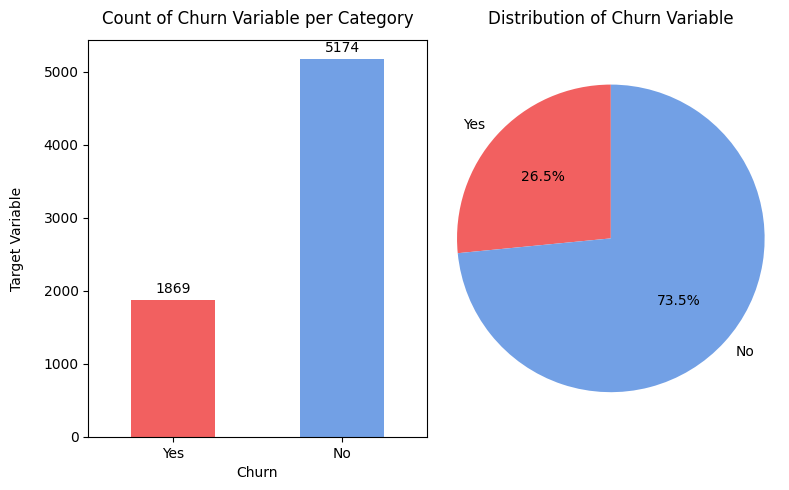

In [9]:
# Data and colors
ordered_counts = churn_df['Churn'].value_counts()[['Yes', 'No']]
colors = ['#f26060', '#72a0e5', '#bb95ed']
# colors3 = ['#f26060', '#72a0e5', '#bb95ed']

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Bar chart
ax_bar = axes[0]
ordered_counts.plot(kind='bar', color=colors, ax=ax_bar)
for bar in ax_bar.patches:
    ax_bar.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + ordered_counts.max() * 0.02,
                str(int(bar.get_height())), ha='center', fontsize=10)
ax_bar.set_ylabel("Target Variable", labelpad=14)
ax_bar.set_title("Count of Churn Variable per Category", y=1.02)
ax_bar.set_xticklabels(ordered_counts.index, rotation=0)

# Pie chart
ax_pie = axes[1]
ax_pie.pie(ordered_counts, labels=ordered_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors)
ax_pie.set_title("Distribution of Churn Variable", y=1.02)
ax_pie.axis('equal')  # Keeps the circle shape

plt.tight_layout()
plt.show()

The target variable in the dataset is imbalanced.

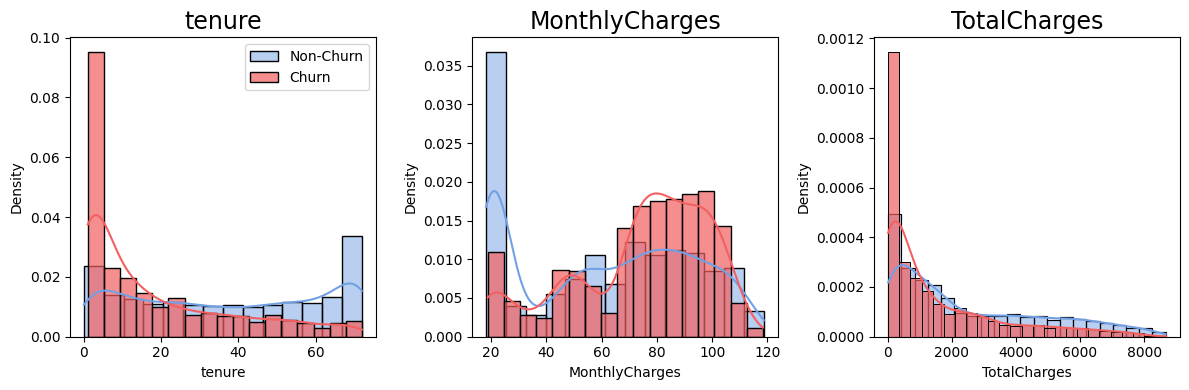

In [10]:
cols_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

non_churn_records = churn_df['Churn'] == 'No'
churn_records = churn_df['Churn'] == 'Yes'

num_cols = len(cols_to_plot)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(cols_to_plot, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(churn_df[col][non_churn_records].dropna(), color=colors[1], kde=True, stat="density", label='Non-Churn')
    sns.histplot(churn_df[col][churn_records].dropna(), color=colors[0], kde=True, stat="density", label='Churn', alpha=0.7)
    plt.title(col, fontsize=17)
    if i == 1:
        plt.legend()
plt.tight_layout()
plt.show()

The numerical variables show distinct patterns between churn and non-churn customers. This indicates that these variables may be useful for predicting customer churn in predictive models.

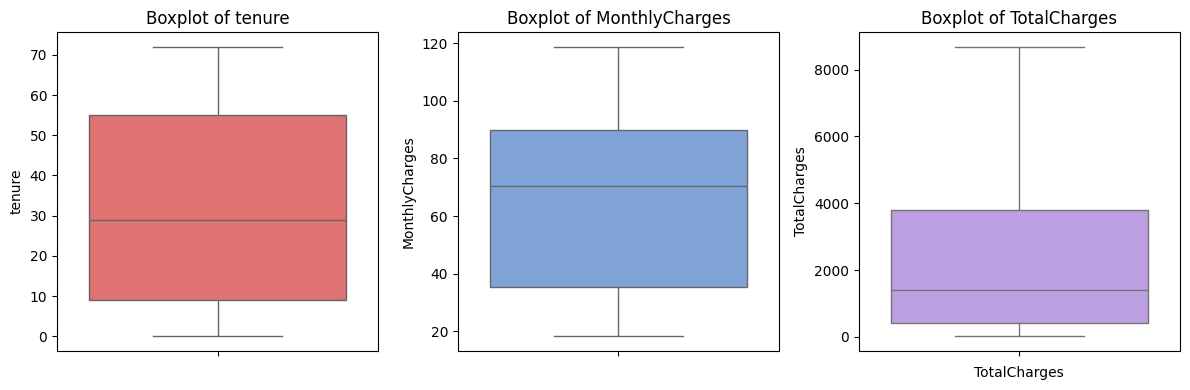

In [ ]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=churn_df[col], color=colors[i % 3])
    plt.title(f'Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

There are no outliers in our numerical features.

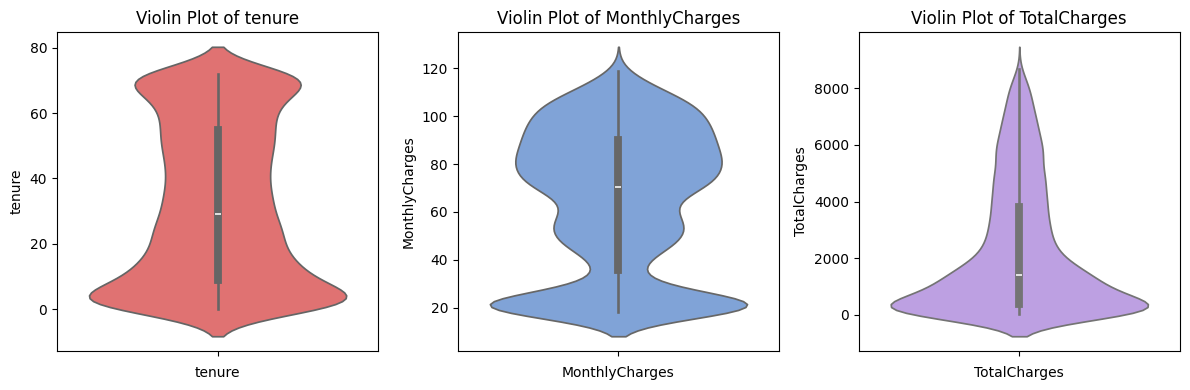

In [12]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(y=churn_df[col], inner="box", color=colors[i % 3])
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Here we can see the distribution of data in the numerical features.

In [13]:
from sklearn.preprocessing import LabelEncoder

def prepare_data_features(df, max_cat_unique=6, exclude_cols=[]):
    """
    Performs label encoding on all categorical (non-numeric) columns,
    and separates categorical and numerical features based on max_cat_unique.
    
    Parameters:
    - df: Input DataFrame
    - max_cat_unique: maximum number of unique values to consider as categorical
    - exclude_cols: list of columns to exclude from processing (e.g., numeric targets)
    
    Returns: df_encoded, categorical_features, numerical_features
    """
    df_encoded = df.copy(deep=True)
    label_encoders = {}
    
    # Identify potential categorical columns
    text_data_features = [
        col for col in df.columns 
        if col not in df.describe().columns and col not in exclude_cols
    ]

    for col in text_data_features:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
    
    # Separate features into categorical and numerical
    categorical_features = []
    numerical_features = []
    for col in df_encoded.columns:
        if col in exclude_cols:
            continue
        if df_encoded[col].nunique() <= max_cat_unique:
            categorical_features.append(col)
        else:
            numerical_features.append(col)
    
    return df_encoded, categorical_features, numerical_features, label_encoders

In [14]:
df_analysis, categorical_features, numerical_features, label_encoders = prepare_data_features(churn_df)
print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


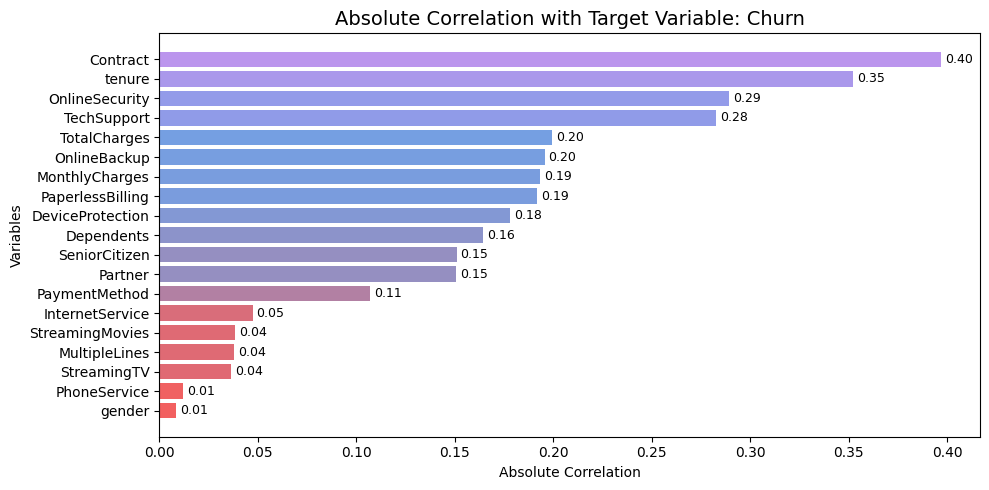

In [15]:
from matplotlib.colors import LinearSegmentedColormap

# Calculates the correlation matrix and sorts by absolute correlation with the target variable
correlation_matrix = df_analysis.corr()
correlations = correlation_matrix["Churn"].abs().sort_values(ascending=False)
correlations = correlations[correlations.index != "Churn"]

cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(correlations.min(), correlations.max())
bar_colors = cmap(norm(correlations.values))

plt.figure(figsize=(10, 5))
bars = plt.barh(correlations.index, correlations.values, color=bar_colors)
plt.title("Absolute Correlation with Target Variable: Churn", fontsize=14)
plt.xlabel("Absolute Correlation")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Variables with the highest correlation at the top

# Adding values at the end of the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.002,                  # A little ahead of the end of the bar
        bar.get_y() + bar.get_height() / 2,       # Centered vertically on the bar
        f"{bar.get_width():.2f}",                 # Formatted with 2 decimal places
        va='center', ha='left', fontsize=9
    )

plt.tight_layout()
plt.show()

Contract, tenure, Online Security, and Tech Support are the categories with the highest correlation to the Churn variable.
Let's explore the distribution of the categorical columns to better understand the behavior of customers who churn.
This type of analysis helps identify the most important features for building a predictive model and can also provide valuable insights for the company to take action on customer retention.
In this analysis, we'll identify which category values the company should focus on when offering promotions to retain customers.

In [16]:
def plot_pie_by_churn(churn_df, coluna, titulo):
    """
    This function plots three pie charts comparing the distribution of a specified categorical column in a DataFrame,
    segmented by whether the customer has churned (Yes/No). The pie charts represent:
    1. The overall distribution of the specified column.
    2. The distribution for customers who have not churned (Churn = No).
    3. The distribution for customers who have churned (Churn = Yes).
    
    Parameters:
    - churn_df: The input DataFrame containing customer data, including a 'Churn' column.
    - coluna: The name of the categorical column to visualize.
    - titulo: The title to be displayed at the top of the entire plot.
    
    The function generates pie charts with custom colors and labels. It also highlights the category with the maximum count
    for customers who have churned.
    """
    
    # Get unique churn labels (Yes, No)
    churn_labels = churn_df['Churn'].unique()
    
    # Get the total count of values in the given column
    value_counts_total = churn_df[coluna].value_counts()
    categories = value_counts_total.index.tolist()  # List of categories
    n_cats = len(categories)  # Number of categories

    # Reverse the color palette: now the largest slice will be lighter!
    blue_palette = ['#25406f', '#4868a8', '#72a0e5', '#b1c9f6'][:n_cats]
    color_map = dict(zip(categories, blue_palette))  # Map categories to colors

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(12.5, 4.5))
    fig.subplots_adjust(top=0.88, wspace=0.15)  # Adjust spacing
    fig.suptitle(titulo, fontsize=16, color='blue', y=0.89)  # Title for the entire plot

    # Plot the overall distribution (all data)
    colors_total = [color_map[cat] for cat in value_counts_total.index]
    value_counts_total.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        legend=False,
        ax=axes[0],
        startangle=60,
        colors=colors_total
    )
    axes[0].set_title('')  # No title for the first pie chart
    axes[0].text(0.5, -0.08, 'Data Distribution', ha='center', va='center', transform=axes[0].transAxes, fontsize=12)  # Label for the first pie chart

    # Plot the distribution for Churn = No
    value_counts_no = churn_df[churn_df['Churn'] == churn_labels[0]][coluna].value_counts().reindex(categories, fill_value=0)
    colors_no = [color_map[cat] for cat in value_counts_no.index]
    value_counts_no.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        legend=False,
        ax=axes[1],
        startangle=60,
        colors=colors_no
    )
    axes[1].set_title('')  # No title for the second pie chart
    axes[1].text(0.5, -0.08, f'Churn = {churn_labels[0]}', ha='center', va='center', transform=axes[1].transAxes, fontsize=12)  # Label for Churn = No

    # Plot the distribution for Churn = Yes
    value_counts_yes = churn_df[churn_df['Churn'] == churn_labels[1]][coluna].value_counts().reindex(categories, fill_value=0)
    idx_max = value_counts_yes.idxmax()  # Find the category with the maximum count
    colors_yes = [ '#f27560' if cat == idx_max else color_map[cat] for cat in value_counts_yes.index ]  # Highlight the max category
    value_counts_yes.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        legend=False,
        ax=axes[2],
        startangle=60,
        colors=colors_yes
    )
    axes[2].set_title('')  # No title for the third pie chart
    axes[2].text(0.5, -0.08, f'Churn = {churn_labels[1]}', ha='center', va='center', transform=axes[2].transAxes, fontsize=12)  # Label for Churn = Yes

    plt.tight_layout(rect=[0, 0.06, 1, 0.94])  # Adjust the layout to fit everything
    plt.show()  # Display the plot


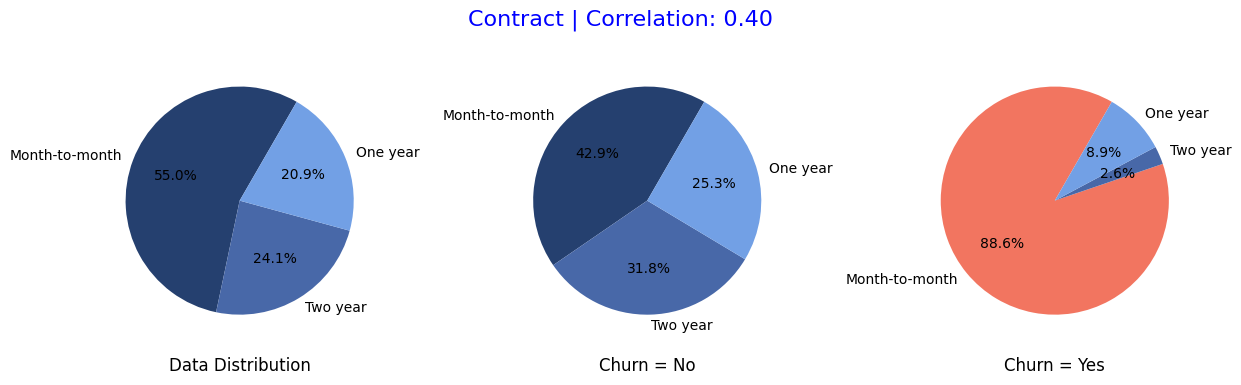

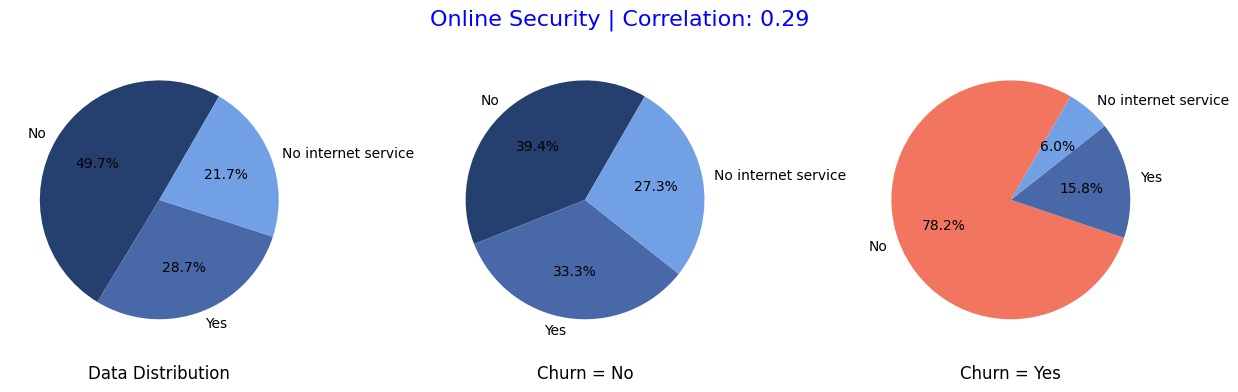

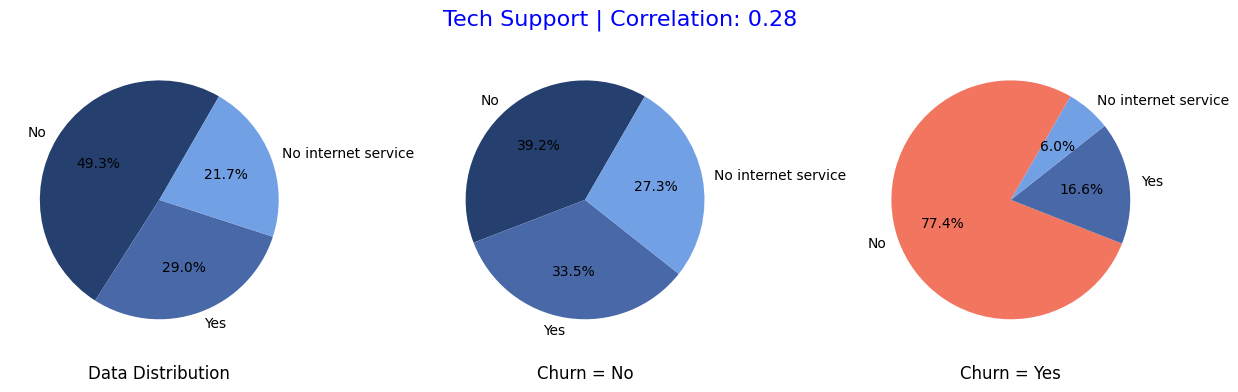

In [17]:
plot_pie_by_churn(churn_df, 'Contract', 'Contract | Correlation: 0.40')
plot_pie_by_churn(churn_df, 'OnlineSecurity', 'Online Security | Correlation: 0.29')
plot_pie_by_churn(churn_df, 'TechSupport', 'Tech Support | Correlation: 0.28')

Here we can see in the last chart (Churn = Yes) the key category values associated with higher or lower churn probability.

For example, looking at the Contract feature (which has the highest correlation with the target), customers with a Month-to-month contract are more likely to churn compared to those with a Two year contract.

In this case, the company should focus on offering benefits or incentives to encourage customers to switch to longer-term contracts, which may help reduce churn.

<Axes: >

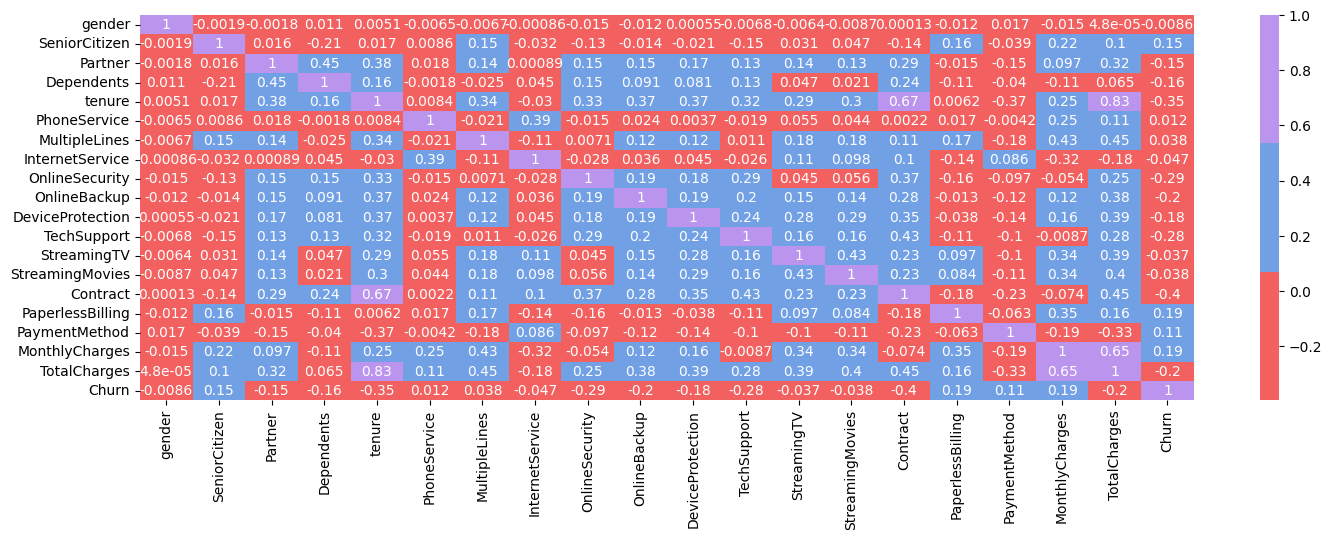

In [18]:
plt.figure(figsize = (17,5))
sns.heatmap(df_analysis.corr(),cmap = colors,annot = True)

A heatmap allows us to quickly observe the correlation between numerical variables. It uses color intensity to indicate the strength and direction of the relationships — with values closer to 1 or -1 showing strong correlations (positive or negative), and values near 0 indicating weak or no correlation.

In [19]:
from matplotlib.colors import LinearSegmentedColormap

def compute_vif_from_df2(df, exclude_cols=None, plot=True, colors=['#f26060', '#72a0e5']):
    """
    This function calculates the Variance Inflation Factor (VIF) for all numerical columns in the DataFrame,
    except for those included in exclude_cols (if any). The VIF is a measure of multicollinearity among the features.
    A higher VIF indicates that the feature is highly correlated with other features.

    Additionally, it generates a bar chart of the VIFs from highest to lowest, with a custom color gradient.
    
    Parameters:
    - df: The input DataFrame containing the data.
    - exclude_cols: A list of columns to exclude from the VIF calculation (default is None, meaning no exclusion).
    - plot: A boolean indicating whether to plot the bar chart (default is True).
    - colors: A list of two colors for the gradient in the plot (default is a red-blue gradient).
    
    Returns:
    - vif_df: A DataFrame containing the VIF values for each feature.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # If no columns are specified to exclude, use an empty list
    exclude_cols = exclude_cols or []

    # Select the numerical columns that are not in the exclude list
    num_cols = [col for col in df.select_dtypes(include='number').columns if col not in exclude_cols]

    # Drop missing values from the selected columns
    X = df[num_cols].dropna()

    # Calculate the VIF for each numerical feature
    vif_data = []
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X.values, i)
        vif_data.append({'feature': num_cols[i], 'VIF': vif})

    # Create a DataFrame from the VIF data and sort it by VIF in descending order
    vif_df = pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False).reset_index(drop=True)

    # If the plot parameter is True, generate a bar chart of the VIF values
    if plot:
        # Create a color gradient for the bar chart
        cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
        norm = plt.Normalize(vif_df['VIF'].min(), vif_df['VIF'].max())
        bar_colors = cmap(norm(vif_df['VIF'].values))
    
        # Create a bar chart
        plt.figure(figsize=(10, 5))
        bars = plt.bar(vif_df['feature'], vif_df['VIF'], color=bar_colors)
        plt.ylabel('VIF')
        plt.title('VIF by Feature (from highest to lowest)')
        plt.xticks(rotation=45)
        
        # Add the VIF values on top of the bars
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Horizontal position (center of the bar)
                height + 0.01,  # Vertical position (a little above the bar)
                f"{height:.2f}",  # Display the VIF value with two decimal places
                ha='center',
                va='bottom',
                fontsize=9
            )
        
        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()  # Show the plot
    
    return vif_df  # Return the DataFrame with VIF values for each feature


The VIF (Variance Inflation Factor) measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. A high VIF (usually > 5 or 10) indicates strong correlation with other variables, which can lead to instability in regression models. A low VIF suggests minimal multicollinearity, which is important for ensuring accurate predictions in regression models.

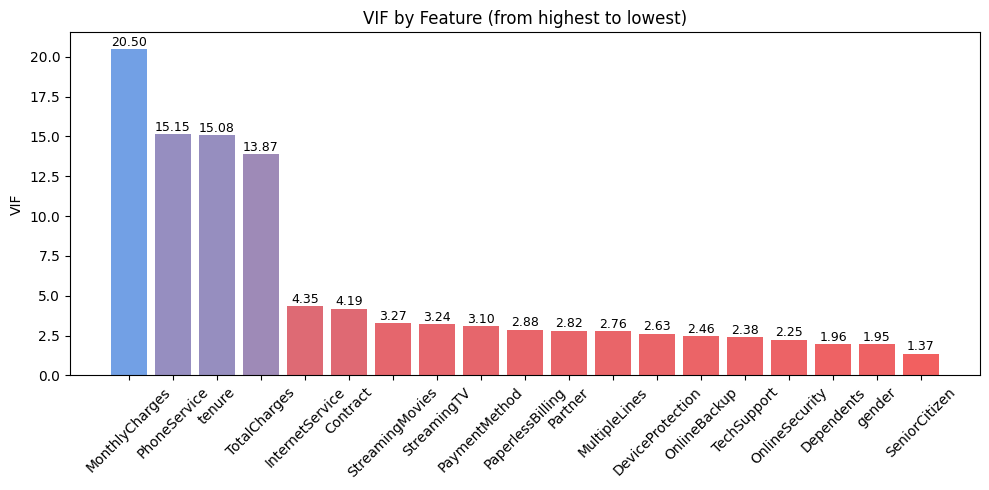

In [20]:
vif_df = compute_vif_from_df2(df_analysis, exclude_cols=['Churn'])

Here we can see the VIF of our dataset. Now, let's check the VIF without the categories Phone Service and Gender.

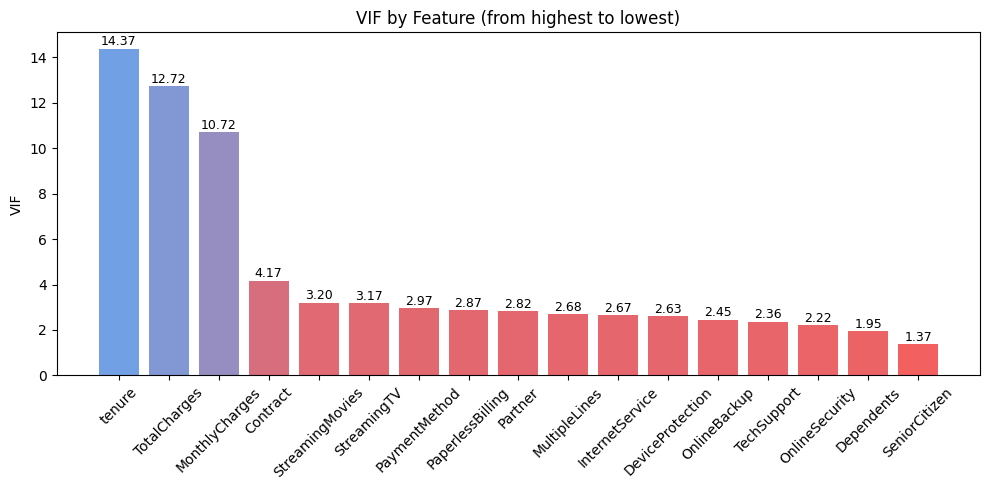

In [21]:
# Excluding columns with less correlation with the target variable
vif_df = compute_vif_from_df2(df_analysis, exclude_cols=['Churn', 'PhoneService', 'gender'])

 The Phone Service category not only has a very low correlation with the target variable Churn, but it also has a very high VIF, suggesting multicollinearity with other features. This could lead us to consider excluding it from the project to improve the model's performance and stability.

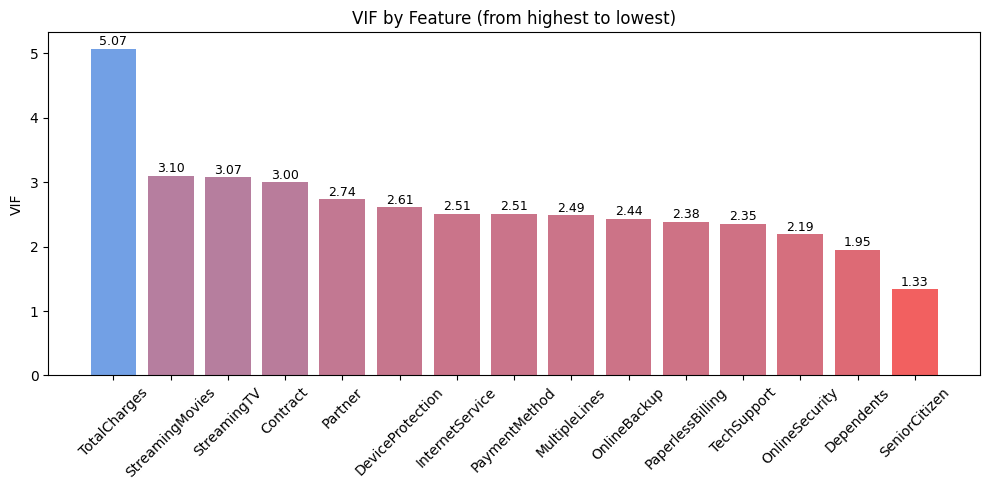

In [22]:
# Excluding columns with less correlation with the target variable, as well as columns that contribute to increasing the VIF
vif_df = compute_vif_from_df2(df_analysis, exclude_cols=['Churn', 'PhoneService', 'gender', 'tenure', 'MonthlyCharges'])

Now, we can see how the VIFs look without the tenure and Monthly Charges categories, and as we can observe, the values are now much lower, which theoretically improves the results for regression models, especially.

Curiosity: The reason the tenure and Monthly Charges columns have such a high VIF is because multiplying these columns generates the TotalCharges column. Therefore, these columns end up bringing redundant information to the dataframe.

<center>
  <div style="font-family: Arial, sans-serif; background-color: #72a0e5; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 2: Data Processing
  </div>
</center>

In [23]:
churn_df_clean = churn_df.copy()

In [24]:
# Remove variables with low correlation
churn_df_clean = churn_df_clean.drop(columns=["PhoneService", "gender"])

churn_df_clean.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

### 2.1: Map Columns

In [25]:
def transform_columns_mapping(dataframe, columns, mapping):
    """
    Transforms the specified columns of the dataframe based on a provided mapping.

    Parameters:
    - dataframe: The DataFrame to be transformed
    - columns: List of columns to apply the mapping to
    - mapping: A dictionary specifying the mapping of old values to new values
    
    The function will replace values in the specified columns using the mapping dictionary.
    """
    for column in columns:
        dataframe[column] = dataframe[column].replace(mapping)


In [26]:
binary_columns = {'Partner', 'Dependents', 'PaperlessBilling', 'Churn'}

mapping = {'Yes': 1, 'No':0}

transform_columns_mapping(churn_df_clean, binary_columns, mapping)

In [27]:
binary_columns_list = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']
churn_df_clean[binary_columns_list].head()

,Partner,Dependents,PaperlessBilling,Churn
0,1,0,1,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


### 2.2: One-Hot Encoding

In [ ]:
# categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Armazenar uma cópia do DataFrame original
original_columns = churn_df_clean.columns.copy()
churn_df_clean = pd.get_dummies(churn_df_clean, columns=categorical_columns, drop_first=True)

In [29]:
# Select columns with boolean data type
bool_columns = churn_df_clean.select_dtypes(include='bool').columns

# Convert boolean columns to integers (True → 1, False → 0)
churn_df_clean[bool_columns] = churn_df_clean[bool_columns].astype(int)

In [30]:
# Comparar as colunas antes e depois
new_columns = churn_df_clean.columns.difference(original_columns)

# Mostrar as primeiras linhas dessas novas colunas
churn_df_clean[new_columns].head()

,Contract_One year,Contract_Two year,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 2.3: Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

X = churn_df_clean.drop(columns=['Churn'])
y = churn_df_clean['Churn']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42) 

print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (4225, 28) (4225,)
Shape of validation set: (1409, 28) (1409,)
Shape of test set: (1409, 28) (1409,)


In [32]:
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(Churn
 0    3104
 1    1121
 Name: count, dtype: int64,
 Churn
 0    1035
 1     374
 Name: count, dtype: int64,
 Churn
 0    1035
 1     374
 Name: count, dtype: int64)

### 2.4: Handle Missing Values

In [33]:
def handle_missing_values(dataframe, column):
    """
    Replaces missing values in the specified column with the median of that column.
    
    Parameters:
    - dataframe: pandas DataFrame containing the data
    - column: string, the name of the column to process
    """
    median_value = dataframe[column].median()
    dataframe[column] = dataframe[column].fillna(median_value)

In [34]:
handle_missing_values(X_train, 'TotalCharges')
print("Total number of missing values in the DataFrame:", X_train.isnull().sum().sum())

Total number of missing values in the DataFrame: 0


In [35]:
handle_missing_values(X_val, 'TotalCharges')
print("Total number of missing values in the DataFrame:", X_val.isnull().sum().sum())

Total number of missing values in the DataFrame: 0


In [36]:
handle_missing_values(X_test, 'TotalCharges')
print("Total number of missing values in the DataFrame:", X_test.isnull().sum().sum())

Total number of missing values in the DataFrame: 0


### 2.5: Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# List of columns to standardize (i.e., scale to have mean 0 and std 1)
cols_to_standardize = ['tenure', 'TotalCharges', 'MonthlyCharges']

# Fit the scaler on the training data and transform it
X_train[cols_to_standardize] = scaler.fit_transform(X_train[cols_to_standardize])

# Use the same scaler to transform validation and test sets (important!)
X_val[cols_to_standardize] = scaler.transform(X_val[cols_to_standardize])
X_test[cols_to_standardize] = scaler.transform(X_test[cols_to_standardize])

X_train[cols_to_standardize].head()


,tenure,TotalCharges,MonthlyCharges
2312,-0.579543,-0.827089,-1.489929
5227,-1.025518,-0.722699,1.047953
6404,0.798927,1.512012,1.484829
88,0.555668,-0.596561,-1.494931
6496,0.312408,0.789990,1.236377


In [38]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2312,0,0,0,-0.579543,0,-1.489929,-0.827089,0,0,0,...,0,1,0,1,0,1,0,0,0,1
5227,0,0,0,-1.025518,0,1.047953,-0.722699,0,1,1,...,0,0,1,0,1,0,0,0,1,0
6404,0,0,0,0.798927,1,1.484829,1.512012,0,1,1,...,1,0,1,0,1,0,1,0,1,0
88,0,1,1,0.555668,1,-1.494931,-0.596561,0,0,0,...,0,1,0,1,0,0,1,0,0,1
6496,1,1,0,0.312408,0,1.236377,0.789990,0,1,1,...,0,0,1,0,1,0,0,0,1,0


### 2.6: Undersampling

In [39]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the undersampler
undersampler = RandomUnderSampler(random_state=42)
# Apply undersampling to the training set (balancing the classes by downsampling the majority class)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (2242, 28) (2242,)


In [40]:
pd.Series(y_train_us).value_counts()

Churn
0    1121
1    1121
Name: count, dtype: int64

### 2.7: Oversampling

In [41]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE oversampler
smote = SMOTE(random_state=42)
# Apply SMOTE to the training set (balancing the classes by generating synthetic examples for the minority class)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of training set after oversampling:", X_train_smote.shape, y_train_smote.shape)

Shape of training set after oversampling: (6208, 28) (6208,)


  File "c:\Users\yamas\OneDrive\Área de Trabalho\DS\myvenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [42]:
pd.Series(y_train_smote).value_counts()

Churn
0    3104
1    3104
Name: count, dtype: int64

<center>
  <div style="font-family: Arial, sans-serif; background-color: #72a0e5; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 3: Machine Learning Model Building
  </div>
</center>


In [43]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_classifier(X_train, y_train, X_test, y_test, model, target_names=['Not Churn', 'Churn']):
    """
    Trains and evaluates a classifier, printing the classification report and AUC-ROC.
    The target names are set to 'Not Churn' and 'Churn' by default.

    Args:
        X_train: Training data (features).
        y_train: Training labels.
        X_test: Test data (features).
        y_test: Test labels.
        model: Classifier (required).
        target_names: List of target names (optional). Defaults to ['Not Churn', 'Churn'].
    """

    model.fit(X_train, y_train)

    # Evaluation on the training set
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    auc_roc_train = roc_auc_score(y_train, y_train_proba)

    print("----- Training Set -----")
    print(classification_report(y_train, y_train_pred, target_names=target_names))
    print(f"AUC-ROC (Train): {auc_roc_train}")


    # Evaluation on the test set
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    auc_roc_test = roc_auc_score(y_test, y_test_proba)

    print("\n\n----- Test Set -----")
    print(classification_report(y_test, y_test_pred, target_names=target_names))
    print(f"AUC-ROC (Test): {auc_roc_test}") 

### 3.1: Logistic Regression

- Standard

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression(random_state=42)

evaluate_classifier(X_train, y_train, X_val, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.85      0.90      0.87      3104
       Churn       0.66      0.55      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.74      4225
weighted avg       0.80      0.80      0.80      4225

AUC-ROC (Train): 0.853349567074685


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

AUC-ROC (Test): 0.8365457645508796


- Undersampling

In [45]:

evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.80      0.75      0.77      1121
       Churn       0.76      0.82      0.79      1121

    accuracy                           0.78      2242
   macro avg       0.78      0.78      0.78      2242
weighted avg       0.78      0.78      0.78      2242

AUC-ROC (Train): 0.8591686090140302


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.91      0.72      0.81      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

AUC-ROC (Test): 0.8359490041075719


- Oversampling

In [46]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.83      0.76      0.80      3104
       Churn       0.78      0.85      0.81      3104

    accuracy                           0.81      6208
   macro avg       0.81      0.81      0.81      6208
weighted avg       0.81      0.81      0.81      6208

AUC-ROC (Train): 0.8926592889786374


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.77      0.82      1035
       Churn       0.53      0.73      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

AUC-ROC (Test): 0.8245382210855356


### 3.2: Logistic Regression 2

In [ ]:
# Drop the features with high VIF
vif_features_to_drop = ['tenure', 'MonthlyCharges']

X_train_lr = X_train.drop(columns=vif_features_to_drop)
X_train_us_lr = X_train_us.drop(columns=vif_features_to_drop)
X_train_smote_lr = X_train_smote.drop(columns=vif_features_to_drop)
X_val_lr = X_val.drop(columns=vif_features_to_drop)
X_test_lr = X_test.drop(columns=vif_features_to_drop)

- Standard

In [48]:
evaluate_classifier(X_train_lr, y_train, X_val_lr, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.84      0.90      0.87      3104
       Churn       0.66      0.54      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.80      0.80      0.80      4225

AUC-ROC (Train): 0.8472037174558797


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

AUC-ROC (Test): 0.8298470639902865


- Undersampling

In [49]:
evaluate_classifier(X_train_us_lr, y_train_us, X_val_lr, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.79      0.74      0.77      1121
       Churn       0.76      0.81      0.78      1121

    accuracy                           0.78      2242
   macro avg       0.78      0.78      0.77      2242
weighted avg       0.78      0.78      0.77      2242

AUC-ROC (Train): 0.8528907619598598


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.90      0.72      0.80      1035
       Churn       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

AUC-ROC (Test): 0.8299271487251025


- Oversampling

In [50]:
evaluate_classifier(X_train_smote_lr, y_train_smote, X_val_lr, y_val, model=logistic_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.82      0.75      0.78      3104
       Churn       0.77      0.84      0.80      3104

    accuracy                           0.79      6208
   macro avg       0.79      0.79      0.79      6208
weighted avg       0.79      0.79      0.79      6208

AUC-ROC (Train): 0.8682293465697737


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.74      0.81      1035
       Churn       0.51      0.74      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409

AUC-ROC (Test): 0.8216655041463226


### 3.3: Random Forest

- Standard

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

evaluate_classifier(X_train, y_train, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      3104
       Churn       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225

AUC-ROC (Train): 0.9998331697122415


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.82      0.89      0.85      1035
       Churn       0.61      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409

AUC-ROC (Test): 0.8109871089410732


- Undersampling

In [52]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      1121
       Churn       1.00      1.00      1.00      1121

    accuracy                           1.00      2242
   macro avg       1.00      1.00      1.00      2242
weighted avg       1.00      1.00      1.00      2242

AUC-ROC (Train): 0.9999534473250514


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.72      0.80      1035
       Churn       0.49      0.75      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.78      0.73      0.74      1409

AUC-ROC (Test): 0.8203751065643647


- Oversampling

In [53]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      3104
       Churn       1.00      1.00      1.00      3104

    accuracy                           1.00      6208
   macro avg       1.00      1.00      1.00      6208
weighted avg       1.00      1.00      1.00      6208

AUC-ROC (Train): 0.999845975263046


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.85      0.81      0.83      1035
       Churn       0.54      0.61      0.57       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409

AUC-ROC (Test): 0.8036696892195613


### 3.4: Gradient Boosting Classifier

- Standard

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()

evaluate_classifier(X_train, y_train, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.86      0.92      0.89      3104
       Churn       0.72      0.57      0.64      1121

    accuracy                           0.83      4225
   macro avg       0.79      0.75      0.76      4225
weighted avg       0.82      0.83      0.82      4225

AUC-ROC (Train): 0.8884233000266698


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.83      0.91      0.87      1035
       Churn       0.68      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC-ROC (Test): 0.8398176134749025


- Undersampling

In [55]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.86      0.80      0.82      1121
       Churn       0.81      0.87      0.84      1121

    accuracy                           0.83      2242
   macro avg       0.83      0.83      0.83      2242
weighted avg       0.83      0.83      0.83      2242

AUC-ROC (Train): 0.9102587771686584


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.91      0.71      0.80      1035
       Churn       0.50      0.81      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

AUC-ROC (Test): 0.838488465214808


- Oversampling

In [56]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.86      0.78      0.82      3104
       Churn       0.80      0.87      0.83      3104

    accuracy                           0.82      6208
   macro avg       0.83      0.82      0.82      6208
weighted avg       0.83      0.82      0.82      6208

AUC-ROC (Train): 0.9093101518492932


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.77      0.83      1035
       Churn       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

AUC-ROC (Test): 0.8307318711410783


### 3.5: Linear SVC

In [57]:
from sklearn.svm import LinearSVC
 
svc = LinearSVC(class_weight='balanced', random_state=42)

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

print(classification_report(y_val, y_pred_svc, target_names=['Churn', 'Not Fraud']))

print("AUC-ROC:", roc_auc_score(y_val, y_pred_svc))

              precision    recall  f1-score   support

       Churn       0.91      0.72      0.80      1035
   Not Fraud       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

AUC-ROC: 0.7587821953550854


### 3.6: Sequential Neural Network

In [58]:
from sklearn.metrics import classification_report, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Função para criar e treinar o modelo
def create_and_train_model(X_train, y_train, X_test, y_test): 
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    print(classification_report(y_test, y_pred_classes))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))

In [59]:
# 1. Treinar com dados originais
print("Treinamento com dados originais:")
create_and_train_model(X_train, y_train, X_val, y_val) 

# 2. Treinar com undersampling
print("\nTreinamento com undersampling:")
create_and_train_model(X_train_us, y_train_us, X_val, y_val)

# 3. Treinar com SMOTE
print("\nTreinamento com SMOTE:")
create_and_train_model(X_train_smote, y_train_smote, X_val, y_val)

Treinamento com dados originais:
Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6135 - recall: 0.1579 - val_loss: 0.4865 - val_recall: 0.0000e+00
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5181 - recall: 0.0301 - val_loss: 0.4580 - val_recall: 0.0000e+00
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5021 - recall: 0.1072 - val_loss: 0.4486 - val_recall: 0.1076
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4678 - recall: 0.1652 - val_loss: 0.4440 - val_recall: 0.2915
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4676 - recall: 0.1767 - val_loss: 0.4415 - val_recall: 0.3139
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4780 - recall: 0.2355 - val_loss: 0.4396 - val_recall: 0.3767
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4661 - recall: 0.2709 - val_loss: 0.4377 - val_recall: 0.4036
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4574 - recall: 0.3466 - val_l

### 3.7: Analyzing Best Results

- Selected by F1-Score and Recall of Churn

<table style="font-family: Arial, sans-serif; border-collapse: collapse; width: 75%;">
  <thead>
    <tr style="background-color: #000000; color: white; font-weight: bold;">
      <th style="border: 1px solid #ddd; padding: 8px;">ML Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Training Set</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Precision (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Recall (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">F1-Score (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
      <th style="border: 1px solid #ddd; padding: 8px;">ROC AUC Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">51%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">79%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression 2</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">50%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">78%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">61%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">73%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Random Forest Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">49%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">75%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">59%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">73%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">82%</td>
    </tr>
    <tr style="background-color: #72a0e5; color: #2D2926; font-weight: bold;">
      <td style="border: 1px solid #ddd; padding: 8px;">Gradient Boosting Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">50%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">81%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SVC</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">51%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">76%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Sequential Neural Network</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">59%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">70%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">64%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">79%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
  </tbody>
</table>


- Selected by ROC AUC Score

<table style="font-family: Arial, sans-serif; border-collapse: collapse; width: 75%;">
  <thead>
    <tr style="background-color: #000000; color: white; font-weight: bold;">
      <th style="border: 1px solid #ddd; padding: 8px;">ML Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Training Set</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Precision (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Recall (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">F1-Score (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
      <th style="border: 1px solid #ddd; padding: 8px;">ROC AUC Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">51%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">79%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression 2</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">50%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">78%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">61%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">73%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Random Forest Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">49%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">75%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">59%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">73%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">82%</td>
    </tr>
    <tr style="background-color: #72a0e5; color: #2D2926; font-weight: bold;">
      <td style="border: 1px solid #ddd; padding: 8px;">Gradient Boosting Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">50%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">81%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SVC</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">51%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">76%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Sequential Neural Network</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">59%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">70%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">64%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">79%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
  </tbody>
</table>


- Selected by Accuracy

<table style="font-family: Arial, sans-serif; border-collapse: collapse; width: 75%;">
  <thead>
    <tr style="background-color: #000000; color: white; font-weight: bold;">
      <th style="border: 1px solid #ddd; padding: 8px;">ML Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Training Set</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Precision (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Recall (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">F1-Score (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
      <th style="border: 1px solid #ddd; padding: 8px;">ROC AUC Score</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #72a0e5; color: #2D2926; font-weight: bold;">
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">66%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">54%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">60%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">81%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression 2</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">66%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">52%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">58%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Random Forest Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">61%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">45%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">52%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">78%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">81%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Gradient Boosting Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">68%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">50%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">57%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SVC</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">51%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">62%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">74%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">76%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Sequential Neural Network</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">64%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">56%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">60%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">80%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
    </tr>
  </tbody>
</table>


<center>
  <div style="font-family: Arial, sans-serif; background-color: #72a0e5; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 4: Model Testing and Conclusion
  </div>
</center>

### 4.1: Testing Best Model Selected by AUC-ROC and F1-Score/Recall of Churn

In [60]:
gbc_model = GradientBoostingClassifier(random_state=42)

evaluate_classifier(X_train_us, y_train_us, X_test, y_test, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.86      0.80      0.82      1121
       Churn       0.81      0.87      0.84      1121

    accuracy                           0.83      2242
   macro avg       0.83      0.83      0.83      2242
weighted avg       0.83      0.83      0.83      2242

AUC-ROC (Train): 0.9102587771686584


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.90      0.72      0.80      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

AUC-ROC (Test): 0.8406727117724562
